In [14]:
#part A Question 1---------------------
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier

# predictinf chance of cancer model using Decision Tree Classifier
#---> read data , get feats, and label and assign a df

cancer_df = pd.read_csv('/Users/crisramos/Desktop/Data Science/Data Sets/Cancer.csv')
feats = ['Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses']
X = cancer_df[feats]
y = cancer_df['Malignant_Cancer']
feats
print(cancer_df)

     Clump_Thickness  Uniformity_of_Cell_Size  Uniformity_of_Cell_Shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
5                  8                       10                        10   
6                  1                        1                         1   
7                  2                        1                         2   
8                  2                        1                         1   
9                  4                        2                         1   
10                 5                        3                         3   
11                 8                        7                         5   
12                 7     

In [15]:
# part B
# split set test n training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, 
                                                    random_state=3)




In [16]:
#Part C
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

results={}

#Decision Tree train and test

my_decisiontree = DecisionTreeClassifier(random_state=3)
my_decisiontree.fit(X_train, y_train)
y_predict_dt = my_decisiontree.predict(X_test)
results['accuracy of DT']=accuracy_score(y_test,y_predict_dt)
#print(y_predict_dt.size)
print(results)

{'accuracy of DT': 0.8301886792452831}


In [17]:
#part D
#print(cancer_df.size)
from collections import Counter 

from sklearn.utils import resample
from sklearn.ensemble import VotingClassifier

# helper methods to extract the majority votes and compare-->

def get_column(array, col):
  result = []
  for row in array:
    result.append(row[col])
  return result
def majority(arr): 
  
    # convert array into dictionary 
    freqDict = Counter(arr) 
  
    # traverse dictionary and check majority element 
    size = len(arr) 
    for (key,val) in freqDict.items(): 
         if (val > (size/2)): 
             #print(key) 
             return key
    
print()  

results_Base=[]

# performing Bagging--->
#print(len(X_train))
for i in range(19):
    bootstarp_size = int(0.8*len(X_train))
    x_bag,y_bag = resample(X_train,y_train, n_samples= bootstarp_size , random_state=i , replace = True)
    Base_DecisionTree = DecisionTreeClassifier(random_state=3)
    Base_DecisionTree.fit(x_bag,y_bag)
    predi=np.array(Base_DecisionTree.predict(X_test))
    #print(predi.size)
    results_Base.append(np.array( predi))
    
final_voting=[]    
#-------------
# going through each column to find the majority of votes 
# append the majority 1 or 0 for each data sample

for i in range(53):
    final_voting.append(majority(get_column(results_Base,i)))
#print(get_column(results_Base,0))
print(final_voting)


print()
#print(results_Base)
accuracy_final={}
# compare the results from the votes to the test
accuracy_final['accuracy of Decison Trees Voting']=accuracy_score(y_test,final_voting)
print(accuracy_final)









[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1]

{'accuracy of Decison Trees Voting': 0.9056603773584906}


In [18]:
# part E

# using Random Forest classifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
#initialize
my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=3)
# fit and predict model.
# then get accuracy results
results_acc={}
my_RandomForest.fit(X_train,y_train)
y_predict_RF = my_RandomForest.predict(X_test)
acc=accuracy_score(y_test,y_predict_RF)
results_acc["Random Forest accuracy"] =acc

print(results_acc)



{'Random Forest accuracy': 0.9245283018867925}


In [19]:
# Question 2-----------------------
# part A
from sklearn import preprocessing

# AHD is prediction model
# get data csv from disk
heartS_df = pd.read_csv('/Users/crisramos/Desktop/Data Science/Data Sets/Heart_short.csv')
feats_Heart=['Age', 'RestBP', 'Chol', 'RestECG', 'MaxHR', 'Oldpeak']
print(heartS_df)

# part B --------------------------
Xh=heartS_df[feats_Heart]
yh=heartS_df['AHD']        # label vector
Xh=preprocessing.scale(Xh) # scale the feats
print(Xh)

# part C train split data.-->

Xh_train, Xh_test, yh_train, yh_test = train_test_split(Xh, yh, test_size=0.25, 
                                                    random_state=3)


     Age  RestBP  Chol  RestECG  MaxHR  Oldpeak  AHD
0     63     145   233        2    150      2.3   No
1     67     160   286        2    108      1.5  Yes
2     67     120   229        2    129      2.6  Yes
3     37     130   250        0    187      3.5   No
4     41     130   204        2    172      1.4   No
5     56     120   236        0    178      0.8   No
6     62     140   268        2    160      3.6  Yes
7     57     120   354        0    163      0.6   No
8     63     130   254        2    147      1.4  Yes
9     53     140   203        2    155      3.1  Yes
10    57     140   192        0    148      0.4   No
11    56     140   294        2    153      1.3   No
12    56     130   256        2    142      0.6  Yes
13    44     120   263        0    173      0.0   No
14    52     172   199        0    162      0.5   No
15    57     150   168        0    174      1.6   No
16    48     110   229        0    168      1.0  Yes
17    54     140   239        0    160      1.

In [20]:
# part D
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

# using Logistic Regression

my_logreg = LogisticRegression()

# fit and  predict model

my_logreg.fit(Xh_train,yh_train)
yh_predict_lr = my_logreg.predict(Xh_test)



In [21]:
from sklearn import metrics

# get prediction probability of model
# and use it to get FPR and TPR. (false posi rate,true posi rate)
# then create AUC ,area under curve.

yh_predict_prob_lr = my_logreg.predict_proba(Xh_test)


# make sure positve label is change according to dataset
fpr, tpr, thresholds = metrics.roc_curve(yh_test, yh_predict_prob_lr[:,1], pos_label="Yes")

print(fpr)
print(tpr)

# ****************. AUC  
AUC = metrics.auc(fpr, tpr)
print()
print("AUC is =",AUC)


[0.         0.02439024 0.02439024 0.04878049 0.04878049 0.09756098
 0.09756098 0.12195122 0.12195122 0.14634146 0.14634146 0.2195122
 0.2195122  0.29268293 0.29268293 0.3902439  0.3902439  0.41463415
 0.41463415 0.46341463 0.46341463 0.56097561 0.56097561 0.68292683
 0.68292683 0.70731707 0.70731707 0.73170732 0.73170732 1.        ]
[0.03333333 0.03333333 0.33333333 0.33333333 0.36666667 0.36666667
 0.4        0.4        0.53333333 0.53333333 0.6        0.6
 0.63333333 0.63333333 0.7        0.7        0.73333333 0.73333333
 0.76666667 0.76666667 0.83333333 0.83333333 0.86666667 0.86666667
 0.93333333 0.93333333 0.96666667 0.96666667 1.         1.        ]

AUC is = 0.7650406504065042


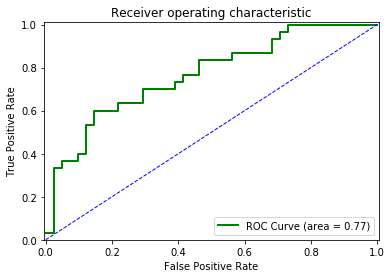

In [22]:
#---->> plot ROC with AUC

import matplotlib.pyplot as plt


%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='green', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()